## Import

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from matplotlib import font_manager
import seaborn as sns

## Fonts

In [2]:
# Font
font_location = '/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

## Read csv

In [3]:
# Read csv

# encoding cp949
data = pd.read_csv('./temp/fire.csv', encoding='cp949' , sep=',')

## 날짜 파싱

In [4]:
# 년-월-일 표기
data['onlyDay'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m-%d')

# 년-월 표기
data['onlyMonth'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%Y-%m')

# 1. 월 별 사망 사고 비율
## 데이터 처리

In [5]:
# 달별 합계
df_sumByMonth = data.groupby(data['onlyMonth']).sum()

# 화재 발생 회수 카운트
df_cntFireOccur= data['화재발생년월일'].groupby(data['onlyMonth']).count()

In [6]:
df_sumByMonth['발생회수'] = data['onlyMonth'].groupby(data['onlyMonth']).count()

## 시각화 ( Graph )

Text(0.5, 1.0, '월 별 사망 사고 비율\n')

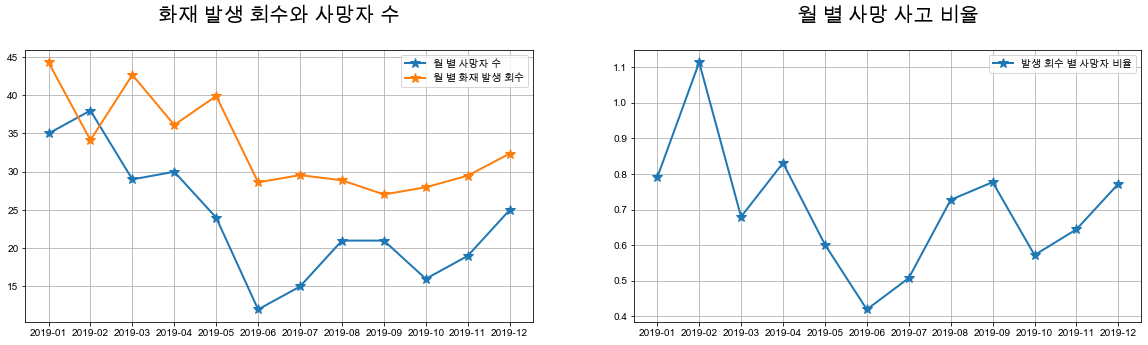

In [7]:
# 월 별 사망 사고 비율
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.plot(df_sumByMonth.index, df_sumByMonth['사망'], marker='*',markersize=10,linewidth=2, label='월 별 사망자 수')
plt.plot(df_sumByMonth.index, df_sumByMonth['발생회수']/100, marker='*',markersize=10,linewidth=2, label='월 별 화재 발생 회수')
plt.grid(True)
plt.legend()
plt.xlabel(u'')
plt.title('화재 발생 회수와 사망자 수\n', size=20)


plt.subplot(122)
plt.plot(df_sumByMonth.index, df_sumByMonth['사망']/df_sumByMonth['발생회수']*100, marker='*',markersize=10,linewidth=2, label='발생 회수 별 사망자 비율')
plt.grid(True)
plt.legend()
plt.xlabel(u'')
plt.title('월 별 사망 사고 비율\n', size=20)

# 화재 유형 별 발생 비율과 재산 피해 비율
## 데이터 전처리

In [8]:
# Create DataFrame
df_dmgPerCase = data.groupby(data['화재유형']).sum()

# 화재 유형 별 화재 발생 건수
df_dmgPerCase['count'] = data['화재유형'].groupby(data['화재유형']).count()

# 화재 유형 별 건당 피해 액 수
df_dmgPerCase['건당피해'] = df_dmgPerCase['재산피해소계']/df_dmgPerCase['count']

# 필요한 열만 잘라내기
df_dmgPerCase = df_dmgPerCase.iloc[:,[0,3,4,5]]

# 정렬
df_srtDmgPerCase = df_dmgPerCase.sort_values('건당피해', ascending=False)

# 출력
df_dmgPerCase

,인명피해(명)소계,재산피해소계,count,건당피해
화재유형,,,,
"건축,구조물",1993,552840022,26025,21242.652142
기타(쓰레기 화재등),166,7633013,7020,1087.323789
"선박,항공기",27,60005851,108,555609.731481
"위험물,가스제조소등",19,6805927,29,234687.137931
임야,133,198547953,2211,89800.069199
"자동차,철도차량",177,32663468,4710,6934.918896


## 시각화 ( Pie )

Text(0, 0.5, '')

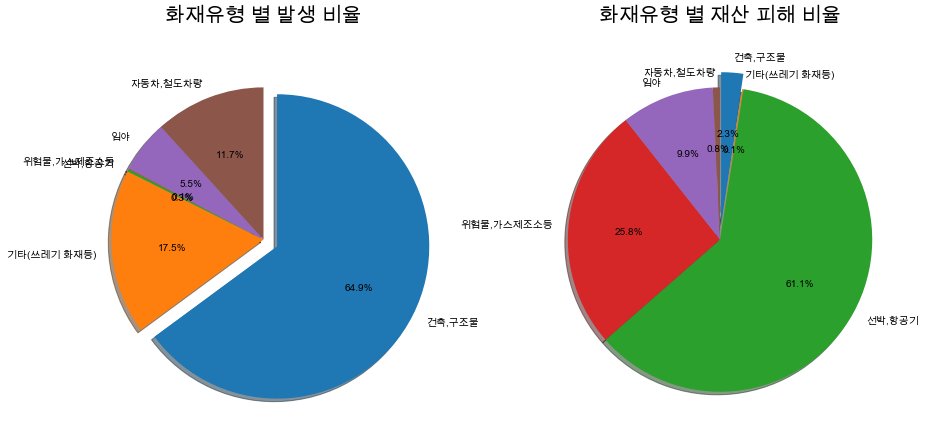

In [9]:
# Make figure
fig1= plt.figure()
# pie explode_value
explode_value = (0.1, 0, 0, 0, 0, 0)
# first chart location
ax2 = fig1.add_subplot(121)
# draw first pie chart
firepie = df_dmgPerCase['count'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax2)
firepie.set_title("화재유형 별 발생 비율\n", fontsize=20)
firepie.set_ylabel("")

# second chart location
ax3 = fig1.add_subplot(122)
# draw second pie chart
damagepie = df_dmgPerCase['건당피해'].plot.pie(figsize=(15,15), autopct='%.1f%%',  startangle=90, counterclock=False, explode = explode_value,
                    shadow=True, ax = ax3)
damagepie.set_title("화재유형 별 재산 피해 비율\n", fontsize=20)
damagepie.set_ylabel("")

# Heatmap

## 데이터 전처리

In [10]:
# 날짜에서 달을 가져와서 +'월'로 붙여줌
data['month'] = pd.to_datetime(data.화재발생년월일).dt.strftime('%m월')

In [11]:
# 중복된 데이터 제거하기
delDup = data.drop_duplicates('화재유형',keep='first') # 화재 유형 중복 제거
delMonth= data.drop_duplicates('month', keep='first') # 월 중복 제거

## 화재 유형 별 발생 회수 ( 데이터 전처리 )

In [12]:
# 결과 값 담을 프레임 생성
dfFstDiv = pd.DataFrame(index=delDup['화재유형'])

In [13]:
# 결과 프레임에 값 넣음
for i in delMonth['month']:
    month = data.month == i
    df_firePerMonth = data.loc[month,:]
    dfTemp=df_firePerMonth['화재유형'].groupby(df_firePerMonth['화재유형']).count().to_frame()
    dfTemp = dfTemp.rename(columns={'화재유형':i})
    dfFstDiv = dfFstDiv.join(dfTemp)

In [14]:
dfFstDiv

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
화재유형,,,,,,,,,,,,
기타(쓰레기 화재등),847,593,901,671,898,552.0,433,433,380,416,418,478
"건축,구조물",2828,2205,2399,2168,2325,1824.0,2054,2007,1921,1884,2084,2326
"자동차,철도차량",399,332,399,373,469,378.0,406,416,366,436,374,362
임야,343,274,556,383,288,99.0,53,21,23,52,56,63
"선박,항공기",11,8,10,11,9,9.0,8,8,5,6,16,7
"위험물,가스제조소등",2,1,2,5,1,NaN,2,3,8,3,1,1


## 화재 유형 별 사망자 수 ( 데이터 전처리 )

In [15]:
# 결과 값 담을 프레임 생성
dfSecDiv = pd.DataFrame(index=delDup['화재유형'])

In [16]:
# 프레임에 값 넣기
for i in delMonth['month']:
    dfTemp = pd.DataFrame()
    for j in delDup['화재유형']:
        month = (data.month == i) & (data.화재유형 == j)
        df_firePerMonth = data.loc[month,:]
        dfTemp = dfTemp.append(df_firePerMonth['사망'].groupby(df_firePerMonth['화재유형']).sum().to_frame())
    dfSecDiv = dfSecDiv.join(dfTemp)
    dfSecDiv = dfSecDiv.rename(columns={'사망':i})

In [17]:
dfSecDiv

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
화재유형,,,,,,,,,,,,
기타(쓰레기 화재등),3,0,1,0,1,0.0,1,2,1,0,0,0
"건축,구조물",26,30,24,17,20,9.0,12,14,15,13,14,22
"자동차,철도차량",5,6,1,5,2,2.0,2,4,4,3,4,3
임야,1,2,3,8,1,0.0,0,0,1,0,1,0
"선박,항공기",0,0,0,0,0,1.0,0,0,0,0,0,0
"위험물,가스제조소등",0,0,0,0,0,NaN,0,1,0,0,0,0


## 시각화 ( Heatmap )

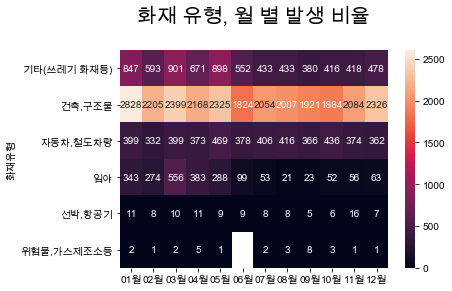

In [18]:
sns.heatmap(dfFstDiv, annot=True,vmin=0,vmax=2600, fmt='.0f')

plt.title('화재 유형, 월 별 발생 비율\n', fontsize=20)

plt.rcParams['figure.figsize']=(10,5)
plt.show()

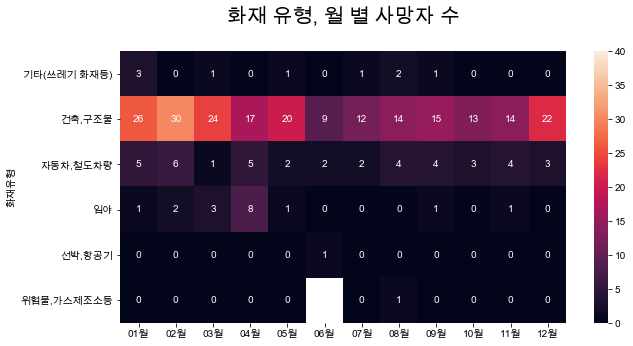

In [19]:
sns.heatmap(dfSecDiv, annot=True,vmin=0,vmax=40, fmt='.0f')

plt.title('화재 유형, 월 별 사망자 수\n', fontsize=20)

plt.rcParams["figure.figsize"] = (10,5)
plt.show()

## 시각화 - 화재 발생량과 사망 비율 비교

Text(1162.0909090909088, 0.5, '')

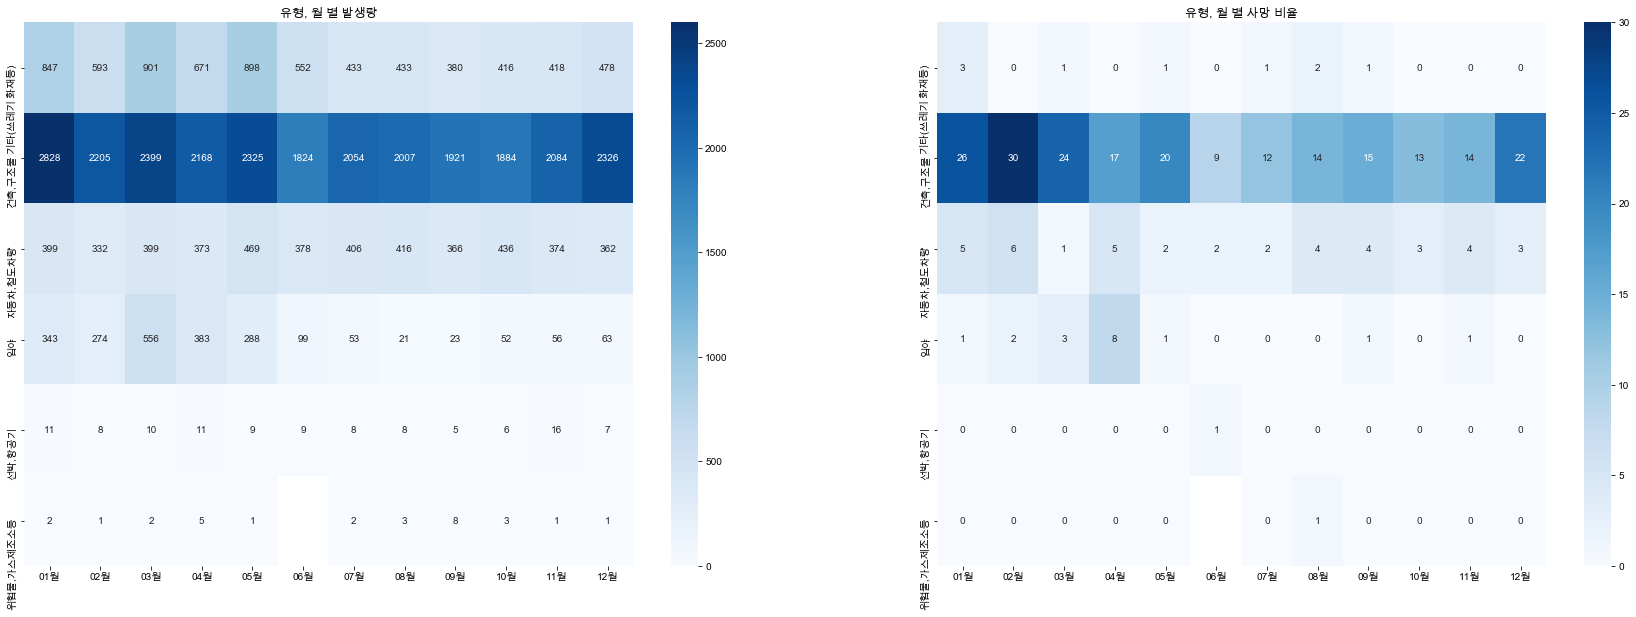

In [20]:
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(30,10)

sns.heatmap(dfFstDiv, annot=True,vmin=0,vmax=2600, fmt='.0f', ax=ax1, cmap='Blues')
sns.heatmap(dfSecDiv, annot=True,vmin=0,vmax=30, fmt='.0f', ax=ax2, cmap='Blues')
ax1.set(title="유형, 월 별 발생량")
ax2.set(title="유형, 월 별 사망 비율")
ax1.set_ylabel('')
ax2.set_ylabel('')

In [21]:
dfCor = pd.DataFrame()

In [22]:
dfCor = dfCor.append(dfFstDiv.T['건축,구조물'])
dfCor = dfCor.rename(index={'건축,구조물':'건축,구조물 발생 회수'})
dfCor

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
"건축,구조물 발생 회수",2828.0,2205.0,2399.0,2168.0,2325.0,1824.0,2054.0,2007.0,1921.0,1884.0,2084.0,2326.0


In [23]:
dfCor = dfCor.append(dfSecDiv.T['건축,구조물'])
dfCor = dfCor.rename(index={'건축,구조물':'건축,구조물 사망자 수'})
dfCor

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
"건축,구조물 발생 회수",2828.0,2205.0,2399.0,2168.0,2325.0,1824.0,2054.0,2007.0,1921.0,1884.0,2084.0,2326.0
"건축,구조물 사망자 수",26.0,30.0,24.0,17.0,20.0,9.0,12.0,14.0,15.0,13.0,14.0,22.0


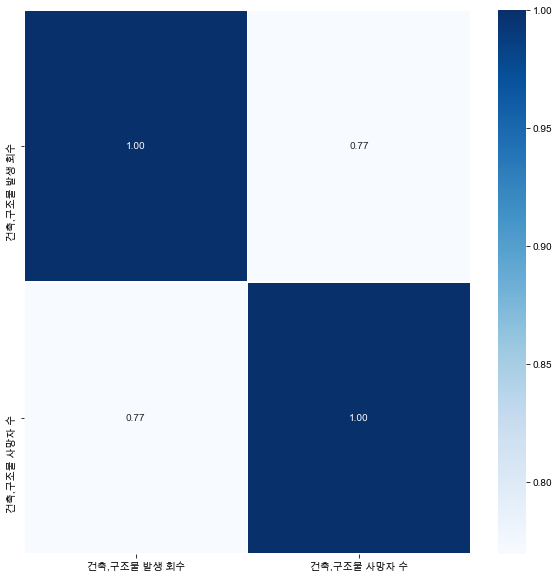

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data = dfCor.T.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')